# Customer Segmentation with K-Means
We have a customer dataset, and we need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

Load Data From CSV File  

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("Customer data.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, __Address__ in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


Also, the __Customer ID__ is just the numbers and have no significance on a customer

In [49]:
df = df.drop(columns= ['Address', 'Customer Id'], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
We use __StandardScaler()__ to normalize our dataset.


Why Standardization is Important for k-means:
- Distance-Based Algorithm: k-means clustering works by minimizing the distance between data points and cluster centroids. If the features are not on the same scale, features with larger ranges will dominate the distance calculations, leading to biased results. For example, if "Income" ranges from 0 to 100,000, while "Age" ranges from 0 to 100, the income feature will heavily influence the cluster formation unless standardized.

- Equal Contribution: Standardization ensures that each feature contributes equally to the distance calculations, allowing k-means to form clusters based on all the features rather than just those with larger numeric values.

In [50]:
import numpy as np

In [51]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5,:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032]])

`X = np.nan_to_num(X)` 
- Replaces all NaN values in X with 0.0
- Replaces all positive infinity values (+inf) in X with the largest finite floating-point number representable by the data type of X.
- Replaces all negative infinity values (-inf) in X with the smallest finite floating-point number representable by the data type of X

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [52]:
from sklearn.cluster import KMeans 

For a dataset, the optimal number of clusters can be determined by using Elbow Point method, Silhoutte Score, Gap Statistics etc. Here we are going to determine the optimal number of clusters for this data by elbow point graph and Silhoutte Score.

The theory behind elbow point graph method is such that, if number of clusters is set equal to number of customers/datapoints in a dataset then the inertia becomes zero, which means that we have made clusters that represent each and every customer individually. But there is no significance of this from Buisness point of view. The Buisnesses often categorizes the customers based on certain characteristics to target these specific groups of customers and effectively allocate marketing resources. So it is known that decreasing inertia is good for us as it will mean the clusters are dense, but it is also obvious that inertia is going to increase with increase in number of clusters. 

The Elbow Method involves plotting the within-cluster sum of squares (inertia) against the number of clusters. The point at which the inertia starts to decrease more slowly (forming an "elbow") suggests an appropriate number of clusters

In [54]:
import matplotlib.pyplot as plt

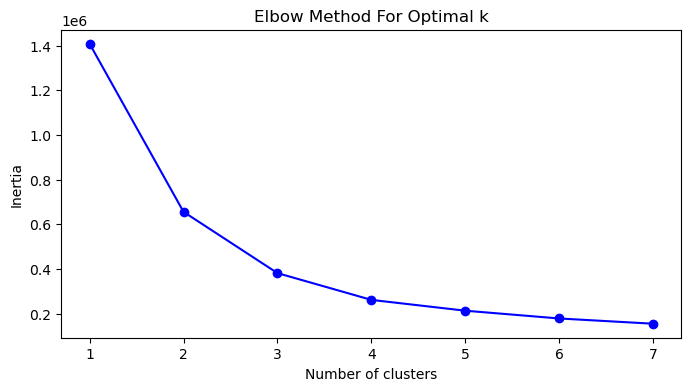

In [53]:
# Determine optimal number of clusters via Elbow Method
inertia_values = []
K = range(1, 8)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(X)
    inertia_values.append(k_means.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia_values, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems that after the cuter number being 3, the rate of decrease of inertia seems to slower before. So, finding the Silhoutte Score to evaluate the clusters by setting the number of clusters to 3

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# Set optimal number of clusters
n_clusters = 3

# Apply KMeans clustering using the optimal number of clusters
k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 12)
k_means.fit(X)

# Get the cluster labels
labels = k_means.labels_

# Compute evaluation metrics
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette:.6f} \n(Range of possible values is [-1, 1]. The higher the value, the better.)")

inertia = k_means.inertia_
print(f"\nInertia: {inertia:.6f} \n(Range of possible values is [0, ∞). The lower the value, the better.)")

Silhouette Score: 0.561666 
(Range of possible values is [-1, 1]. The higher the value, the better.)

Inertia: 381849.382150 
(Range of possible values is [0, ∞). The lower the value, the better.)


Now lets see what heppens if we set the number of clusters to 5, just to see the results.

In [57]:
# Set optimal number of clusters
n_clusters = 5

# Apply KMeans clustering using the optimal number of clusters
k_means5 = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 12)
k_means5.fit(X)

# Get the cluster labels
labels5 = k_means5.labels_

# Compute evaluation metrics
silhouette5 = silhouette_score(X, labels5)
print(f"Silhouette Score: {silhouette5:.6f} \n(Range of possible values is [-1, 1]. The higher the value, the better.)")

inertia5 = k_means5.inertia_
print(f"\nInertia: {inertia5:.6f} \n(Range of possible values is [0, ∞). The lower the value, the better.)")

Silhouette Score: 0.368471 
(Range of possible values is [-1, 1]. The higher the value, the better.)

Inertia: 213638.955185 
(Range of possible values is [0, ∞). The lower the value, the better.)


Now, if we just see the inertia values, then we see that inertia is less when number of clusters is increased, but it was expected and not to be seen as an improvement over the 3-cluster model. We can clearly see that Silhoutte score is decreased and it also finally affirms the trend observed in elbow point graph.

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [58]:
df["Clus_km"] = labels
df.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [59]:
df.groupby('Clus_km').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, let's look at the distribution of customers based on their age and income:


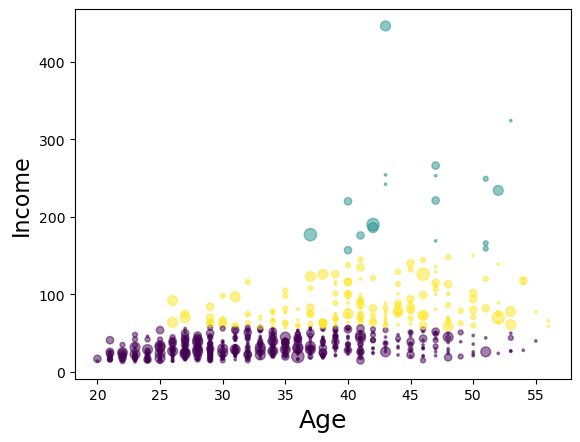

In [60]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


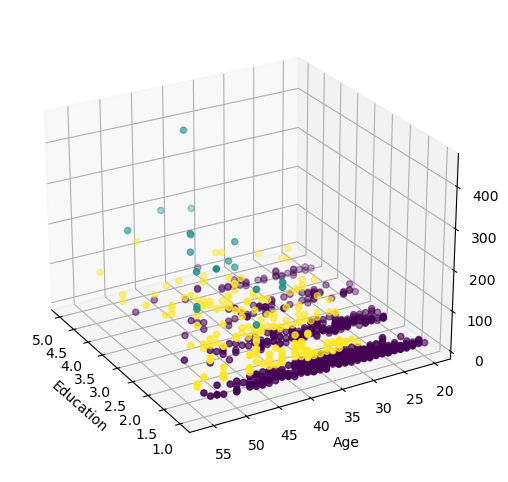

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=25, azim=150)

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float), cmap='viridis', s=20)

plt.show()


k-means have partition these customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME
